In [23]:
#Upload and Analyze the data set given in csv format and perform data preprocessing and visualization
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("C:/Users/Acer/Desktop/FDS Project/sales_data.csv")
df

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0
...,...,...,...,...,...,...
364,2022-12-27,Watch,Accessories,150.0,5.0,750.0
365,2022-12-28,Coat,Clothing,100.0,5.0,500.0
366,2022-12-29,Headphones,Electronics,100.0,10.0,1000.0
367,2022-12-30,Smartphone,Electronics,600.0,11.0,6600.0


In [24]:
df.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


In [25]:
df.shape

(369, 6)

In [27]:
df.describe()

,price,quantity,revenue
count,367.000000,368.000000,368.000000
mean,211.226158,14.565217,2060.679348
std,227.335170,8.595740,1910.930790
min,20.000000,3.000000,300.000000
25%,50.000000,8.000000,800.000000
50%,100.000000,12.000000,1200.000000
75%,300.000000,20.000000,2400.000000
max,1200.000000,50.000000,7200.000000


In [26]:
df.isnull().sum()

date        0
product     0
category    0
price       2
quantity    1
revenue     1
dtype: int64

In [28]:
  df['price'] = df['price'].fillna(df['price'].median())

In [29]:
df.isnull().sum()

date        0
product     0
category    0
price       0
quantity    1
revenue     1
dtype: int64

In [30]:
df.shape

(369, 6)

In [31]:
df.dropna(subset=['quantity','revenue'],inplace=True)

In [32]:
df.isnull().sum()

date        0
product     0
category    0
price       0
quantity    0
revenue     0
dtype: int64

In [33]:
df.shape

(367, 6)

In [34]:
df['date']

0      2022-01-01
1      2022-01-01
2      2022-01-02
3      2022-01-03
4      2022-01-04
          ...    
364    2022-12-27
365    2022-12-28
366    2022-12-29
367    2022-12-30
368    2022-12-31
Name: date, Length: 367, dtype: object

In [35]:
df['date']=pd.to_datetime(df['date'])

In [36]:
df['date']

0     2022-01-01
1     2022-01-01
2     2022-01-02
3     2022-01-03
4     2022-01-04
         ...    
364   2022-12-27
365   2022-12-28
366   2022-12-29
367   2022-12-30
368   2022-12-31
Name: date, Length: 367, dtype: datetime64[ns]

In [38]:
df.dtypes

date        datetime64[ns]
product             object
category            object
price              float64
quantity           float64
revenue            float64
dtype: object

In [40]:
product_summary=df.groupby('category').agg({'price':'sum','quantity':'sum'}).reset_index()
print(product_summary)

      category    price  quantity
0  Accessories  10680.0     952.0
1         Bags   1150.0     390.0
2         Bgas     50.0      18.0
3     Clohting     40.0      30.0
4     Clothing   6380.0    2251.0
5  Electronics  56700.0    1439.0
6        Shoes   1840.0     258.0
7      Shoeses     80.0      12.0


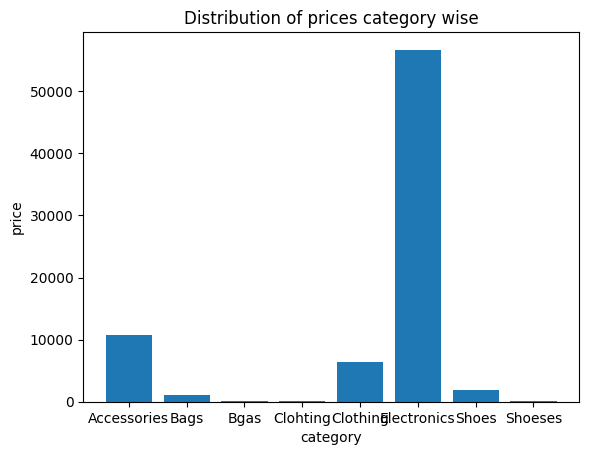

<Figure size 1200x600 with 0 Axes>

In [50]:
plt.bar(product_summary['category'],product_summary['price'])
plt.title("Distribution of prices category wise")
plt.xlabel("category")
plt.ylabel("price")
plt.figure(figsize=(12,6))
plt.show()

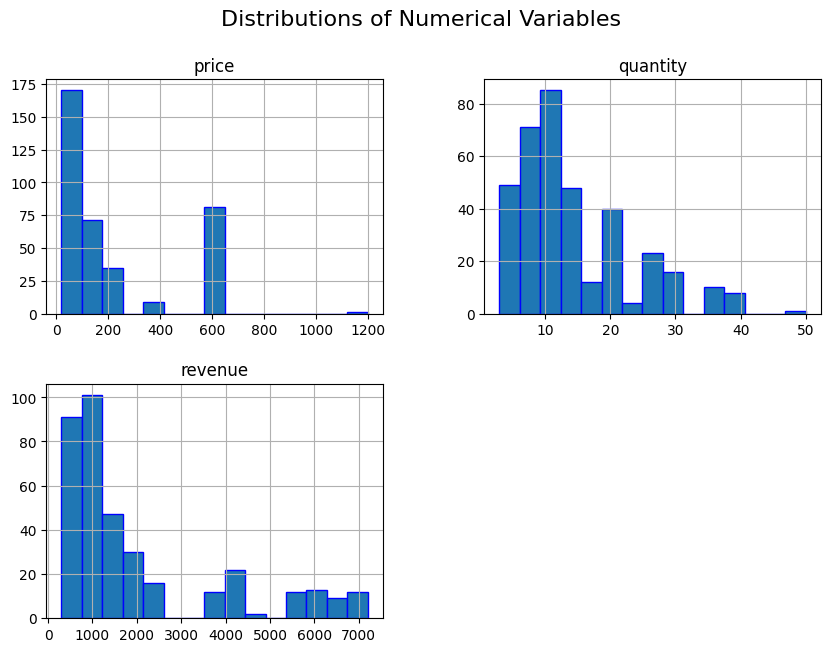

In [41]:
numerical_columns=['price','quantity','revenue']
df[numerical_columns].hist(bins=15,figsize=(10,7),edgecolor='blue')
plt.suptitle("Distributions of Numerical Variables", fontsize=16)
plt.show()

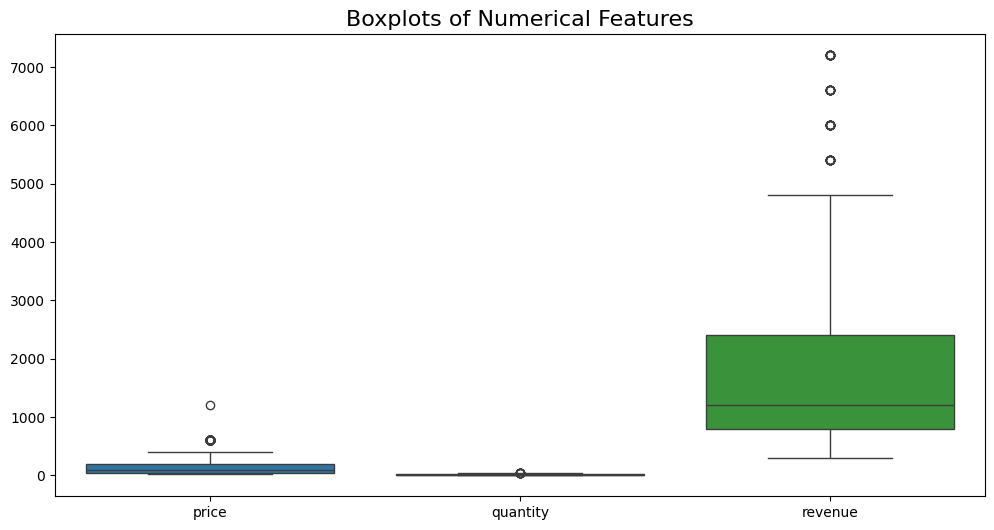

In [58]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numerical_columns])
plt.title("Boxplots of Numerical Features", fontsize=16)
plt.show()

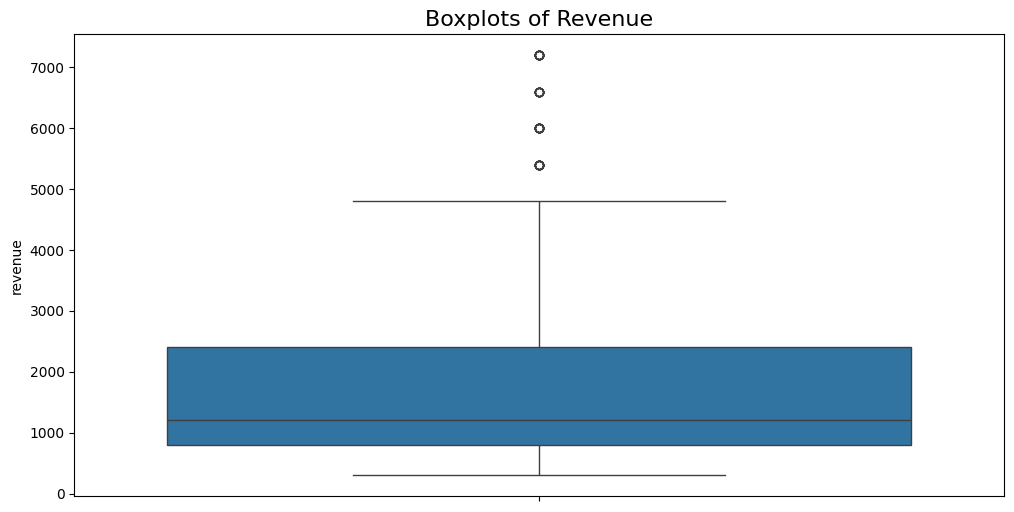

In [60]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.boxplot(data=df['revenue'])
plt.title("Boxplots of Revenue", fontsize=16)
plt.show()

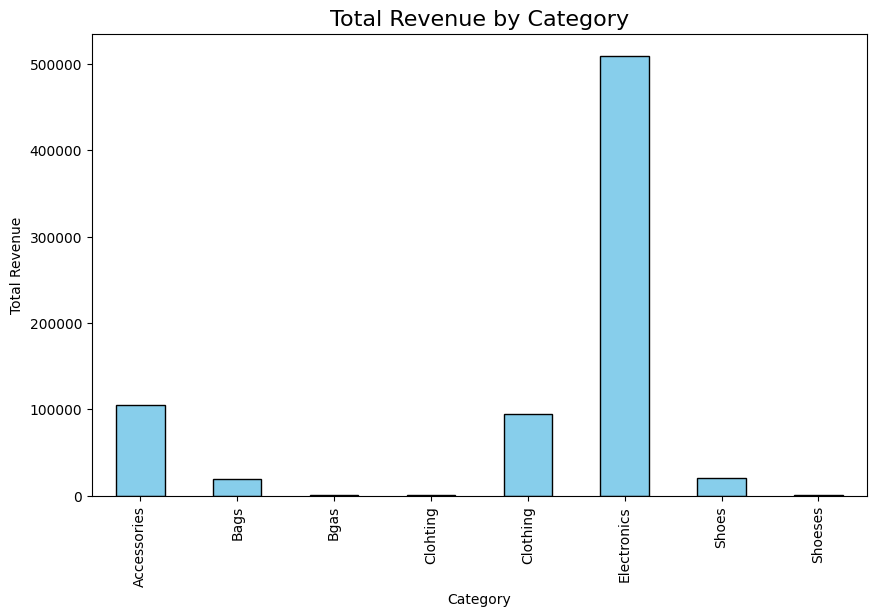

In [61]:
category_revenue = df.groupby('category')['revenue'].sum()
category_revenue.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title("Total Revenue by Category", fontsize=16)
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.show()

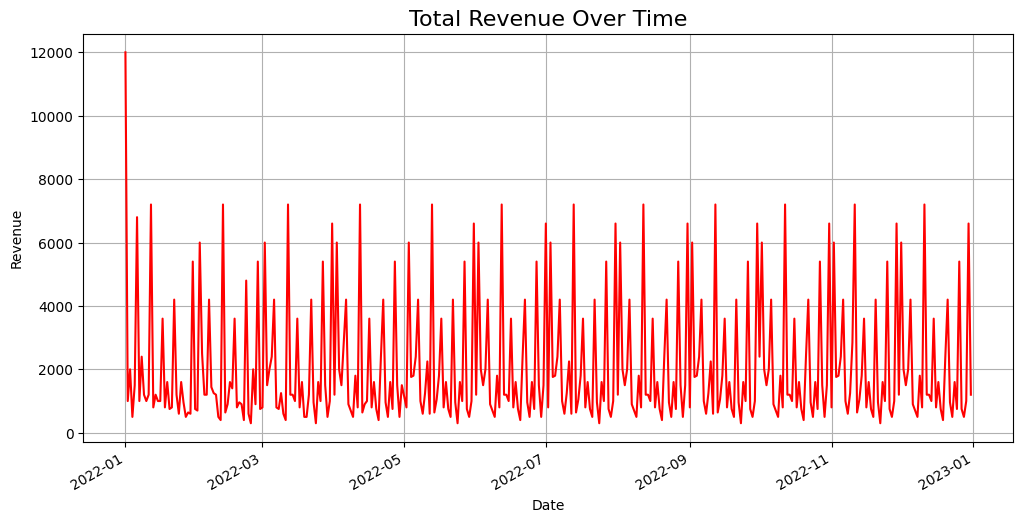

In [63]:
time_series = df.groupby('date')['revenue'].sum()
time_series.plot(figsize=(12, 6), color='red')
plt.title("Total Revenue Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

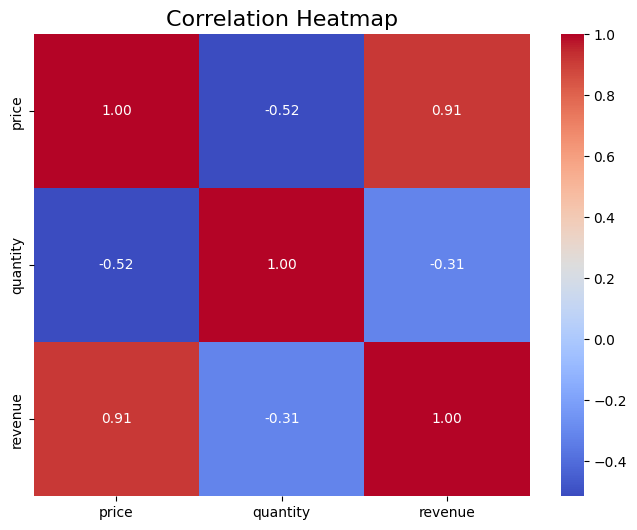

In [64]:
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap", fontsize=16)
plt.show()